In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/thiyanesh17/DataScientists_Notes/refs/heads/main/EDA%20Day1/Data/companytest.csv')
data.head()

,Company,Age,Salary
0,b,40.0,9000000.0
1,d,300.0,1000.0
2,a,30.0,-400.0
3,'a',20.0,NaN
4,c,30.0,NaN


In [ ]:
data

,Company,Age,Salary
0,b,40.0,9000000.0
1,d,300.0,1000.0
2,a,30.0,-400.0
3,'a',20.0,NaN
4,c,30.0,NaN
5,'a',35.0,2300.0
6,c,40.0,3000.0
7,a,23.0,4000.0
8,c,NaN,5000.0
9,a,NaN,6000.0


In [ ]:
Using Quartile we are going to identify the outlier .

IQR = Q3-q1

q1-1.5(IQR)
q3+1.5IQR

In [ ]:
data.select_dtypes(exclude=np.number).columns[:]

Index(['Company'], dtype='object')

In [ ]:
import numpy as np
for col_name in data.select_dtypes(include=np.number).columns[:]:
  print(col_name)
  q1 = data[col_name].quantile(0.25)
  q3 = data[col_name].quantile(0.75)
  IQR = q3-q1
  low = q1-1.5*IQR
  high = q3+1.5*IQR
  print("low_value",low)
  print("high_value",high)
  print("outlier=",data.loc[(data[col_name]<low)| (data[col_name]>high),col_name])
  data.loc[(data[col_name]<low)| (data[col_name]>high),col_name]=data[col_name].median()




Age
low_value -2.5
high_value 65.5
outlier= 1    300.0
Name: Age, dtype: float64
Salary
low_value -3094.5
high_value 13157.5
outlier= 0    9000000.0
Name: Salary, dtype: float64


In [ ]:
data

,Company,Age,Salary
0,b,40.0,4412.0
1,d,34.0,1000.0
2,a,30.0,-400.0
3,'a',20.0,NaN
4,c,30.0,NaN
5,'a',35.0,2300.0
6,c,40.0,3000.0
7,a,23.0,4000.0
8,c,NaN,5000.0
9,a,NaN,6000.0


In [3]:
#seaborn
#visualisation library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_train = pd.read_csv(r'https://raw.githubusercontent.com/thiyanesh17/DataScientists_Notes/refs/heads/main/EDA%20Day1/Data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


<ipython-input-17-38e1db4910e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

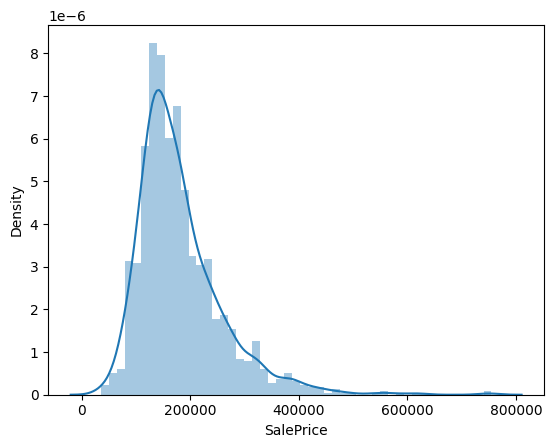

In [ ]:
sns.distplot(df_train['SalePrice'])

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

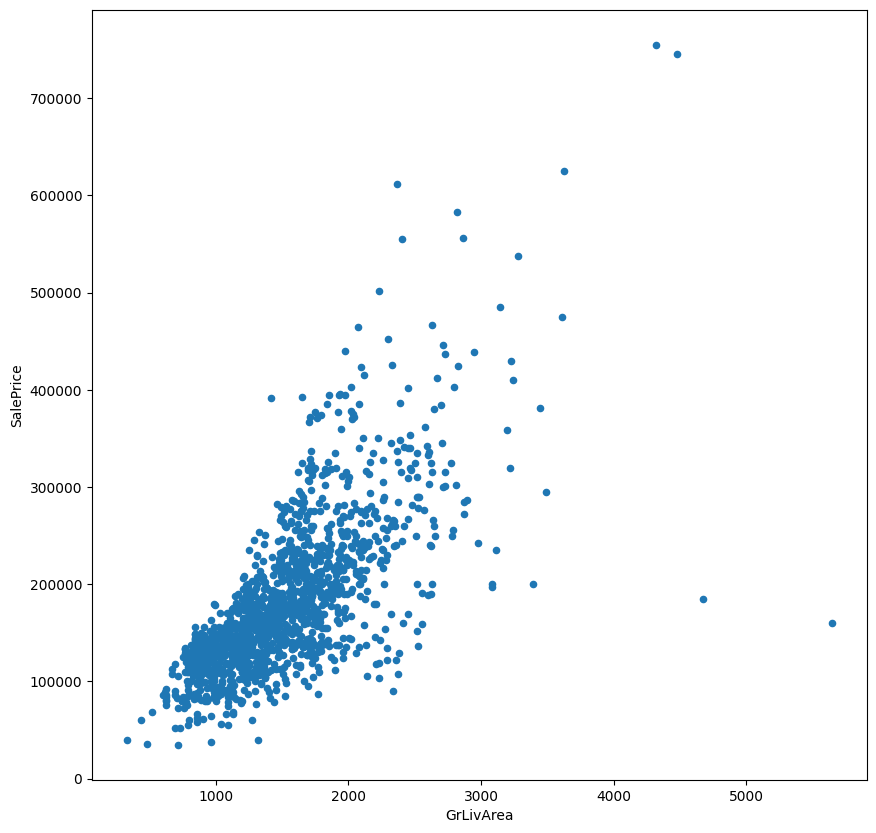

In [ ]:
df_train.plot.scatter(x='GrLivArea',y='SalePrice',figsize=(10,10))

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

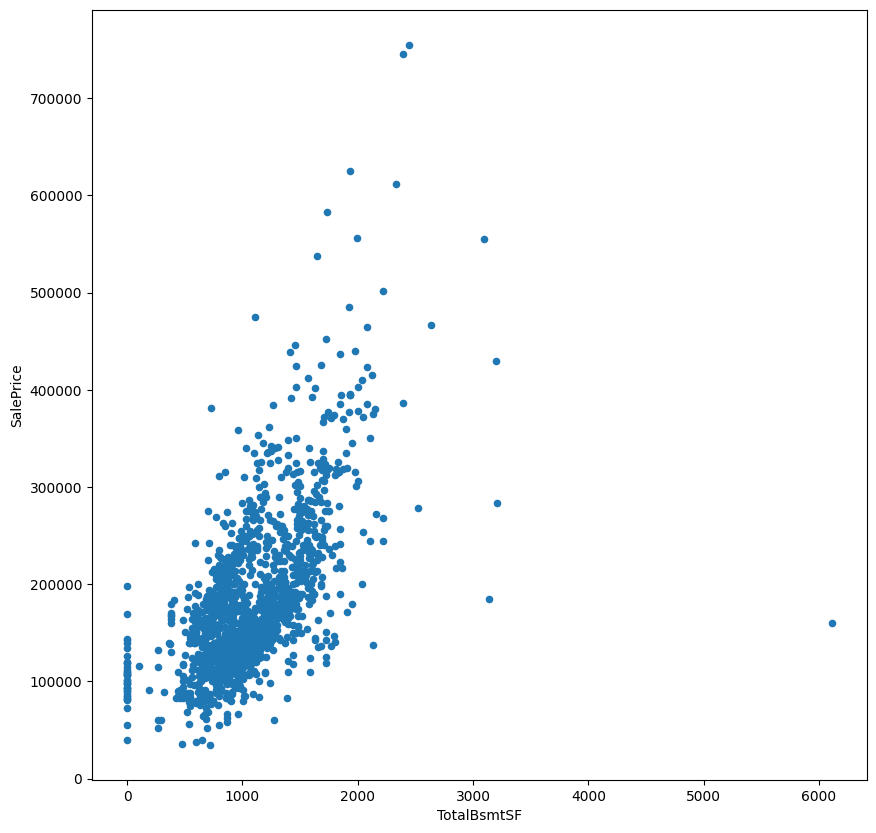

In [ ]:
df_train.plot.scatter(x='TotalBsmtSF',y='SalePrice',figsize=(10,10))

In [ ]:
df_train['OverallQual'].value_counts()

,count
OverallQual,
5,397
6,374
7,319
8,168
4,116
9,43
3,20
10,18
2,3


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

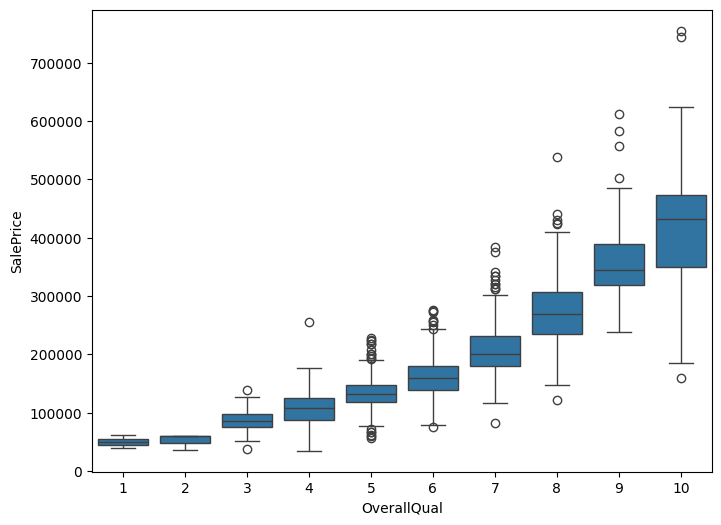

In [ ]:
plt.subplots(figsize=(8,6))
sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)


In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
import pandas as pd
import numpy as np

df_train.corr()

ValueError: could not convert string to float: 'RL'

In [9]:
#distribution Plot

In [10]:
#scatter plot.
#correlation matrix tells you how two variables are co related to each other.
# lets say there are 1000 X variable and there is one Y variable
# Feature Engineering, : Tries to get as many as information taht you can collect with reduced columns/increased columns preserving the information/variance.
# basement Square feet and Ground living area = Two are positvely corerelated (0.95)


In [13]:
df_numeric = df_train.select_dtypes(include=np.number)
df_numeric.head()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


<Axes: >

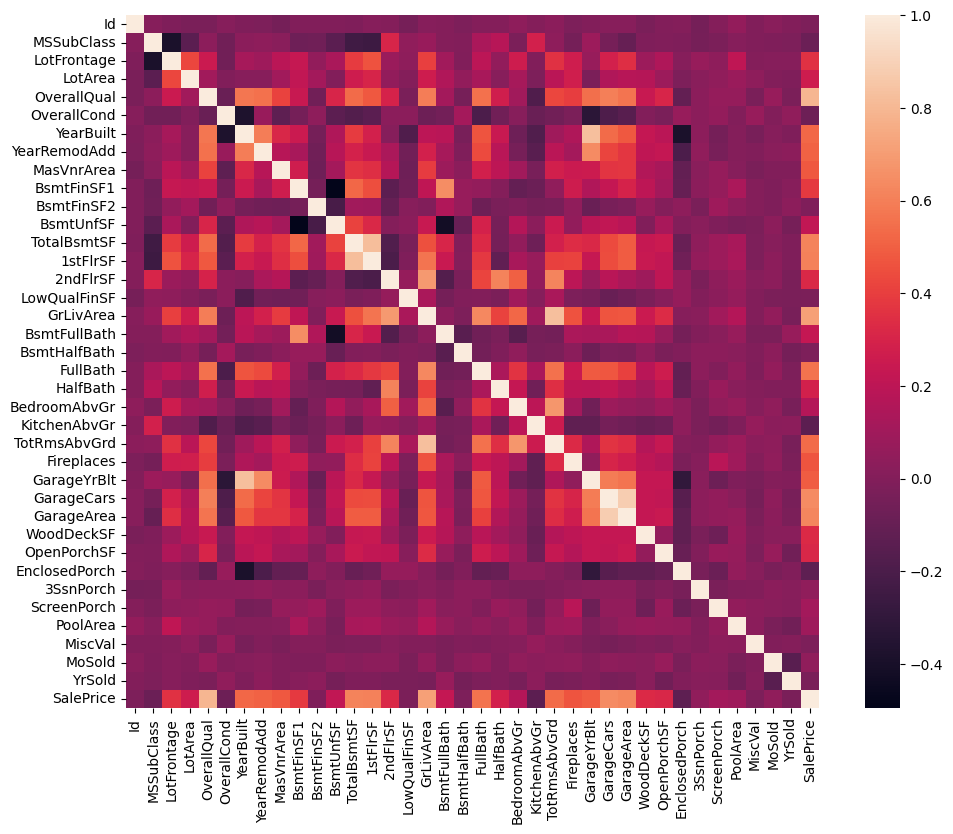

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr_mat = df_numeric.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,square=True)

In [17]:
cols = corr_mat.nlargest(10,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [ ]:
# variation Inflation Factor
# Mutual Information
# Feature Importance by Random forest

In [21]:
cols = corr_mat.nlargest(10,'SalePrice')['SalePrice'].index

In [22]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

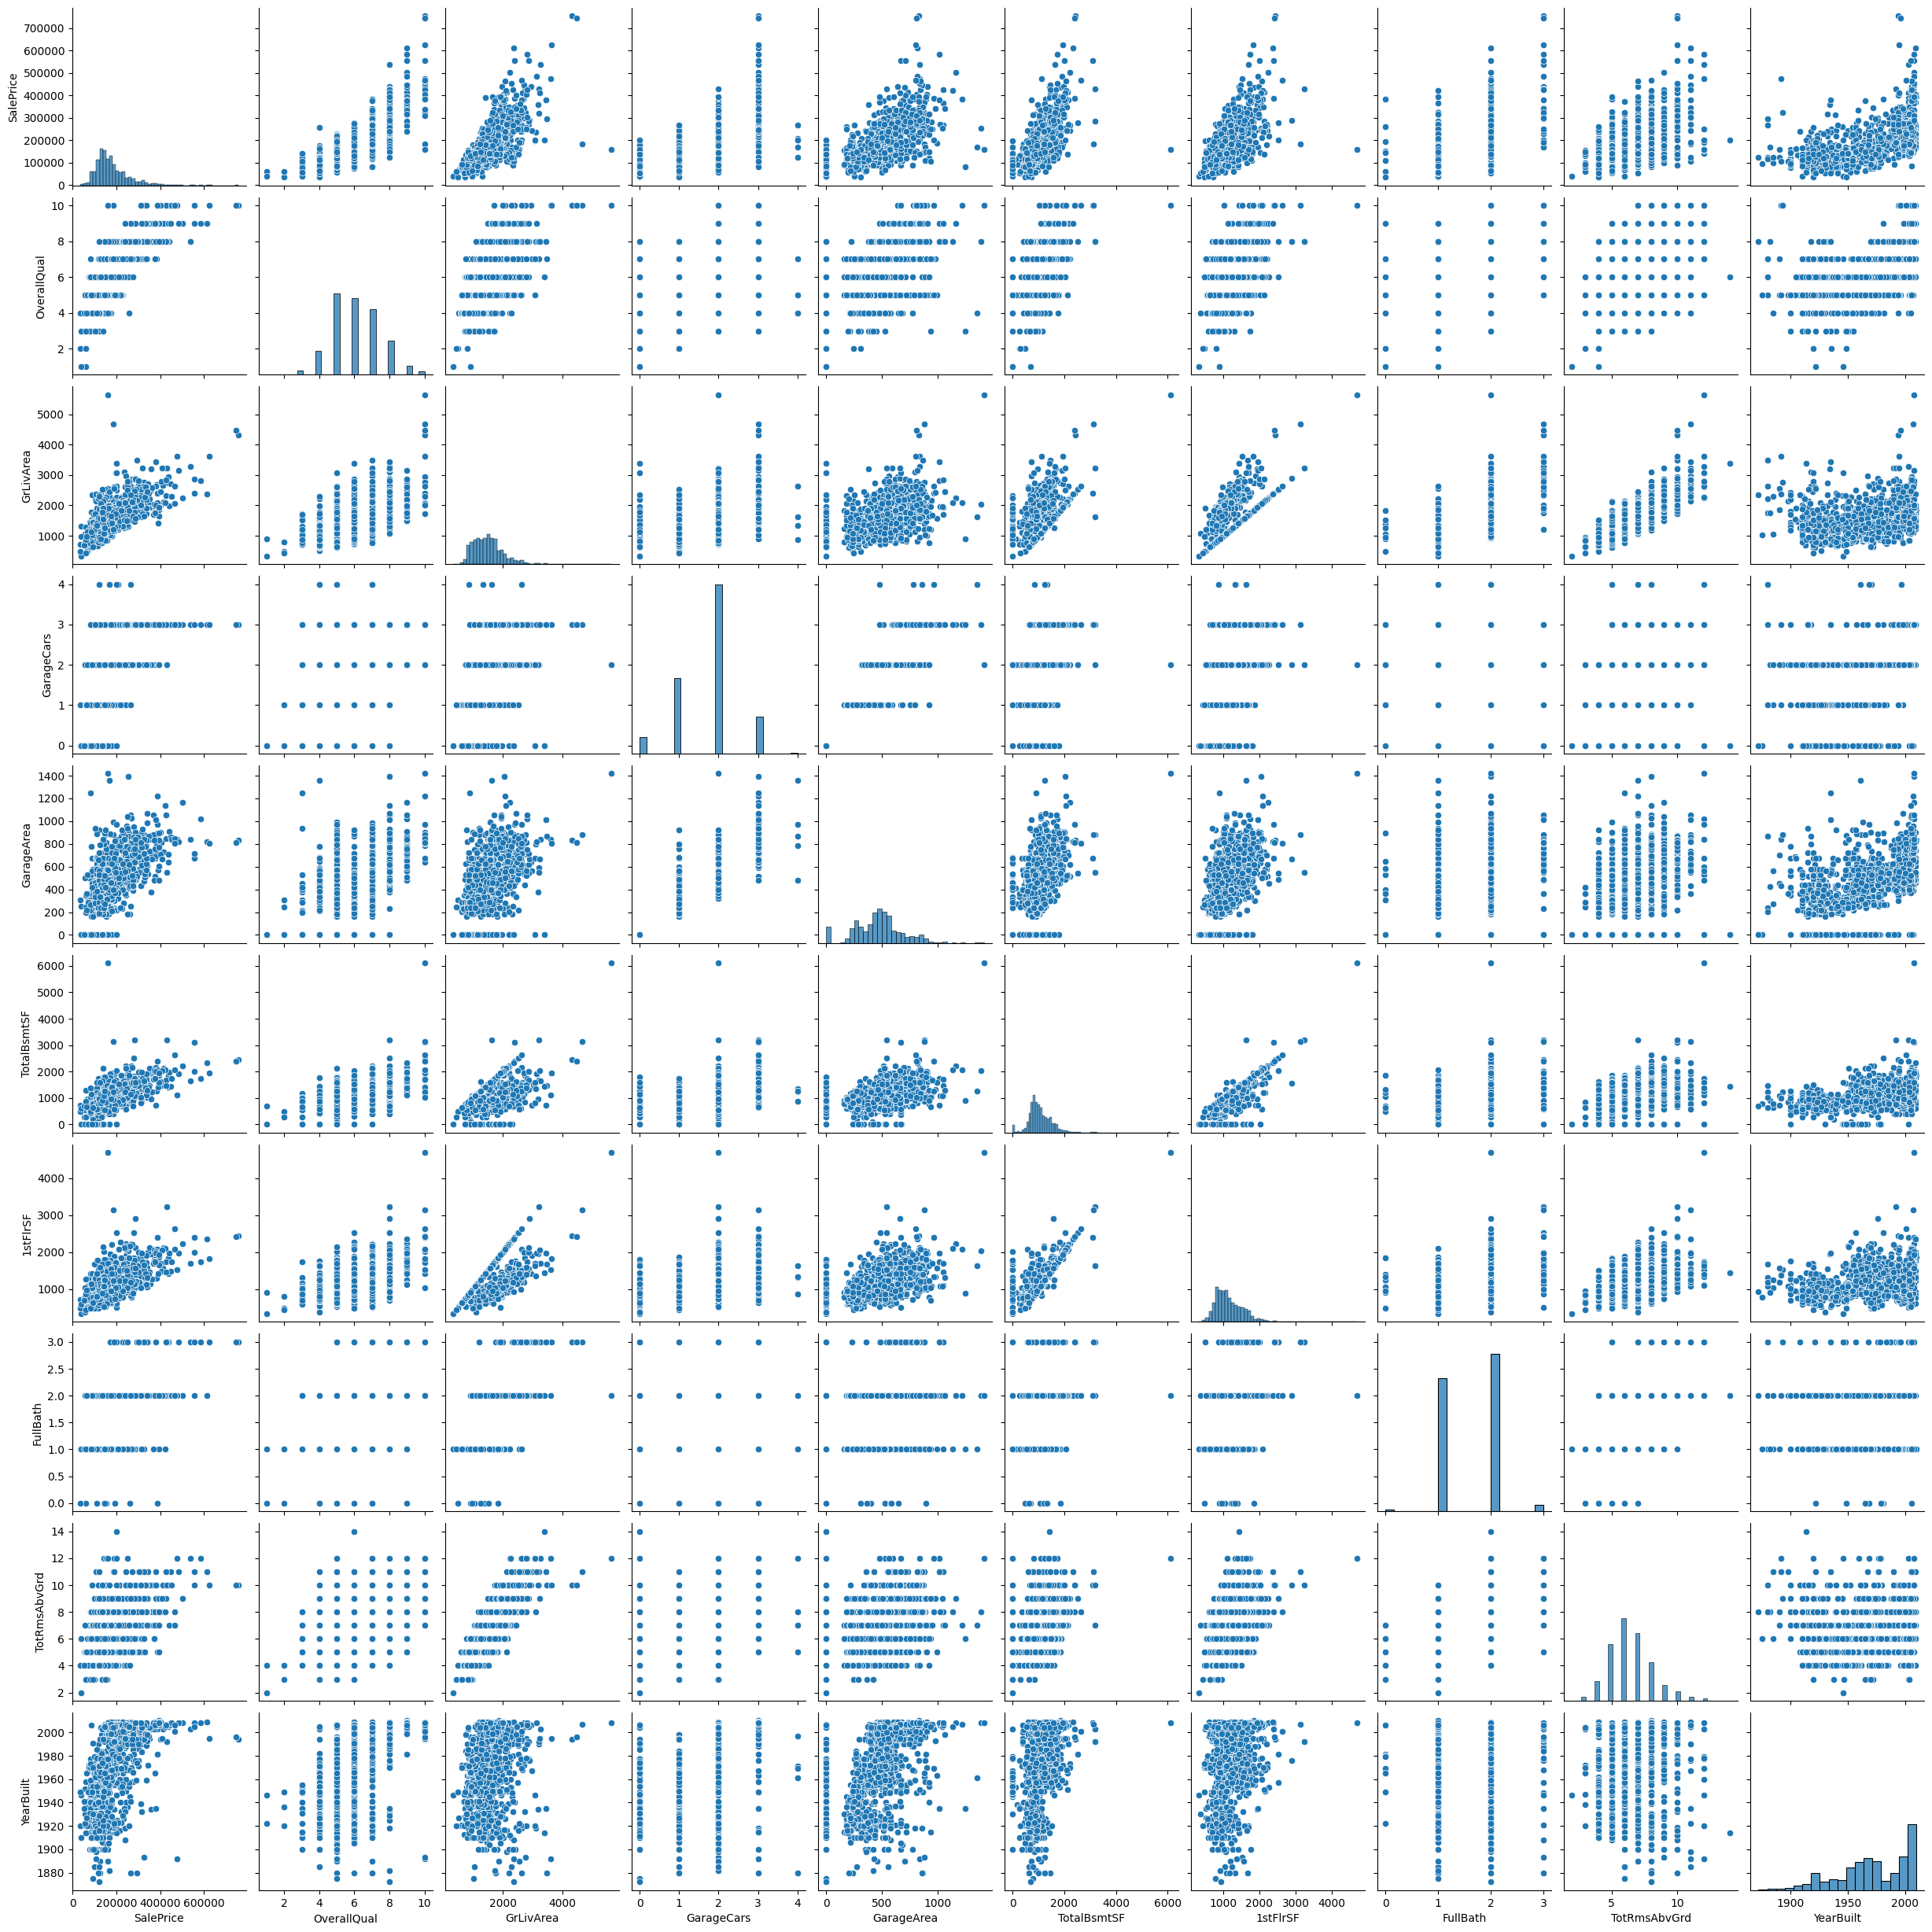

In [24]:
sns.pairplot(df_train[cols])
plt.show()
